In [129]:
#20BHI10028 - TUSHAR MISRA
import pandas as pd
df=pd.read_csv("data3.csv")
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,city
0,313000.0,3,1.50,1340,7912,1.5,0,3,Shoreline
1,2384000.0,5,2.50,3650,9050,2.0,4,5,Seattle
2,342000.0,3,2.00,1930,11947,1.0,0,4,Kent
3,420000.0,3,2.25,2000,8030,1.0,0,4,Bellevue
4,550000.0,4,2.50,1940,10500,1.0,0,4,Redmond


In [130]:
df.drop(['view','city'],axis='columns', inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
0,313000.0,3,1.50,1340,7912,1.5,3
1,2384000.0,5,2.50,3650,9050,2.0,5
2,342000.0,3,2.00,1930,11947,1.0,4
3,420000.0,3,2.25,2000,8030,1.0,4
4,550000.0,4,2.50,1940,10500,1.0,4


In [131]:
for x in df.index:
    if df.loc[x, "price"] > 550000.0:
        df.loc[x, "price"] = 1
    else:
        df.loc[x, "price"] = 0
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
0,0.0,3,1.50,1340,7912,1.5,3
1,1.0,5,2.50,3650,9050,2.0,5
2,0.0,3,2.00,1930,11947,1.0,4
3,0.0,3,2.25,2000,8030,1.0,4
4,0.0,4,2.50,1940,10500,1.0,4


In [132]:
X = df.drop("price", axis="columns")
y = df.price
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
0,3,1.50,1340,7912,1.5,3
1,5,2.50,3650,9050,2.0,5
2,3,2.00,1930,11947,1.0,4
3,3,2.25,2000,8030,1.0,4
4,4,2.50,1940,10500,1.0,4
...,...,...,...,...,...,...
4595,3,1.75,1510,6360,1.0,4
4596,3,2.50,1460,7573,2.0,3
4597,3,2.50,3010,7014,2.0,3
4598,4,2.00,2090,6630,1.0,3


In [133]:
y

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
4595    0.0
4596    0.0
4597    0.0
4598    0.0
4599    0.0
Name: price, Length: 4600, dtype: float64

In [134]:
from sklearn. preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler. fit_transform(X)
X_scaled[:3]

array([[-0.44112227, -0.84320364, -0.82997105, -0.19343402, -0.02241648,
        -0.6671122 ],
       [ 1.75970468,  0.43280154,  1.56852826, -0.16171766,  0.90655464,
         2.28641631],
       [-0.44112227, -0.20520105, -0.21736733, -0.0809775 , -0.9513876 ,
         0.80965205]])

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=1)

In [136]:
# 1st model
from sklearn import tree
model1=tree. DecisionTreeClassifier()
model1.fit(X_train, y_train)
score1=model1.score (X_test, y_test)

In [137]:
# 2nd model
from sklearn. naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(X_train, y_train)
score2=model2.score(X_test, y_test)

In [138]:
# 3rd model
from sklearn.svm import SVC
model3=SVC( )
model3.fit(X_train, y_train)
score3=model3.score(X_test, y_test)

In [139]:
# 4th model
from sklearn. linear_model import LogisticRegression
model4=LogisticRegression( )
model4.fit(X_train, y_train)
score4=model4.score(X_test, y_test)

In [140]:
# train using bagging
from sklearn. ensemble import BaggingClassifier
from sklearn. tree import DecisionTreeClassifier
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.7756521739130435

In [141]:
# Ensemble Learning model
from sklearn. ensemble import VotingClassifier

# Making the final model using voting classifier
final_model = VotingClassifier(estimators=[('tree', model1), ('nb', model2), ('svc', model3), ('lr' , model4)])

# training all the model on the train dataset
final_model.fit(X_train, y_train)

# predicting the output on the test dataset
pred_final = final_model. predict(X_test)

# printing Log Loss between actual and predicted value
score_el=final_model.score(X_test, y_test)

In [142]:
accuracy=[score1,score2,score3,score4,score_el]
models=['Decision Tree','Naive Bayes','Support Vector Machine','Logistic Regression','Ensemble Learning']
my_dict = dict(zip(models, accuracy))


In [143]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

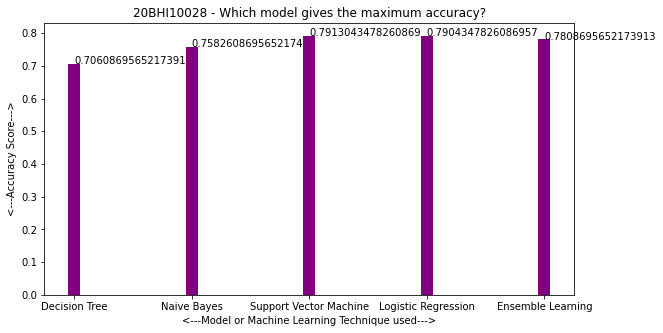

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9.5, 5))  # width:9.5, height:5
plt.bar(range(len(my_dict)), my_dict.values(), align='edge', width=0.0)
plt.bar(models, accuracy, width=0.1,color="purple")
addlabels(models, accuracy)
plt.ylabel("<---Accuracy Score--->")
plt.xlabel("<---Model or Machine Learning Technique used--->")
plt.title("20BHI10028 - Which model gives the maximum accuracy?")
plt.show()

In [145]:
# Conclusion - 20BHI10028 - TUSHAR MISRA
#
# Support Vector Machine is giving the highest accuracy
# 2nd highest accuracy is given by Logistic Regression
# 3rd highest accuracy is given by Ensemble Learning
# 4th highest accuracy is given by Naive Bayes
# Least accuracy is given by Decision Tree